<a href="https://colab.research.google.com/github/boleamol/Machine-Learning/blob/main/Gaussian_Trnasformaion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification

In [2]:
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=2000, n_classes=2, weights=[1,1], random_state=1)

In [3]:
X.shape

(2000, 20)

In [4]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [5]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [6]:
## RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.9838611111111111


In [7]:
ytrain_pred

array([[1.  , 0.  ],
       [0.98, 0.02],
       [0.04, 0.96],
       ...,
       [0.97, 0.03],
       [0.97, 0.03],
       [0.29, 0.71]])

In [8]:
#  Logistic Regression
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9863568922694498
Logistic test roc-auc: 0.9885777777777777


In [9]:
# Adaboost Classifier
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9975081174960356
Adaboost test roc-auc: 0.9826111111111111


In [10]:
# KNNClassifier
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.981670071491109
Adaboost test roc-auc: 0.9426111111111111


In [11]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9850333333333334


In [12]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.97,0.991861,0.559186,1.0
1,0.00,0.000008,0.463282,0.0
2,0.96,0.966929,0.538202,0.8
3,0.90,0.761539,0.509875,0.8
4,0.61,0.779443,0.490344,0.4
...,...,...,...,...
595,0.01,0.024239,0.461121,0.0
596,0.02,0.000003,0.441377,0.0
597,1.00,0.984385,0.532403,1.0
598,0.01,0.001147,0.441720,0.2


In [13]:
final_prediction

0      0.880262
1      0.115823
2      0.816283
3      0.742853
4      0.569947
         ...   
595    0.123840
596    0.115345
597    0.879197
598    0.163217
599    0.832357
Length: 600, dtype: float64

In [14]:
#### Calculate the ROc Curve


fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.91188114, 0.91188114, 0.90674686, 0.90577475, 0.80199934,
       0.80162833, 0.78127646, 0.7805558 , 0.76303202, 0.76287124,
       0.72710041, 0.72637362, 0.71097576, 0.70393711, 0.67647732,
       0.67493537, 0.6065152 , 0.60614346, 0.59462652, 0.58675354,
       0.57577749, 0.57550386, 0.56146627, 0.55627948, 0.54845371,
       0.54469563, 0.54308969, 0.54139283, 0.52115858, 0.48866892,
       0.4396034 , 0.37840767, 0.37629719, 0.35995613, 0.35336612,
       0.24901541, 0.24890421, 0.24868663, 0.24396893, 0.20963088,
       0.20598417, 0.11783548, 0.1178351 , 0.10548439])

In [15]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
30,0.439603,0.961667
29,0.488669,0.958333
28,0.521159,0.956667
27,0.541393,0.956667
26,0.543090,0.955000


In [16]:
accuracy_ls

,thresholds,accuracy
30,0.439603,0.961667
29,0.488669,0.958333
28,0.521159,0.956667
27,0.541393,0.956667
26,0.543090,0.955000
25,0.544696,0.955000
23,0.556279,0.955000
22,0.561466,0.953333
24,0.548454,0.953333
21,0.575504,0.950000


In [17]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

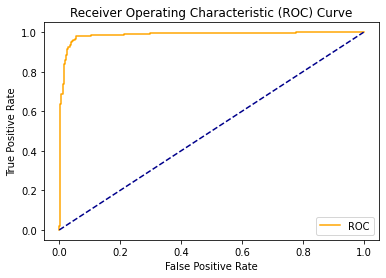

In [18]:
plot_roc_curve(fpr,tpr)